In [ ]:
# Copyright 2023 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Advanced Retrieval Augmented Generation (RAG) strategies w/ Langchain
|||
|----------|-------------|
| Author(s)   | Abhishek Bhagwat |
| Reviewers(s) | Rajesh Thallam |
| Last updated | 31/10/2023 - Initial Draft |
|  | 14/11/2023 - Refactor code, added observability |
|  | 14/02/2024 - Upgraded packages, added error handling for comparison table |






## Overview

We will cover some advanced RAG techniques part of the L400 enablement series.

1. MultiQueryRetriever
2. ContextualCompressionRetriever
3. EnsembleRetriever
4. ParentDocumentRetriever



## Initial Setup

In [ ]:
!pip install google-cloud-aiplatform
!pip install langchain
!pip install langchain-google-vertexai
!pip install unstructured
!pip install "unstructured[pdf]"
!pip install chromadb
!pip install rank_bm25
!pip install prettyprinter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 816.1/816.1 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.4/246.4 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: google-cloud-storage
    Found existing installation: google-cloud-storage 2.8.0
    Uninstalling google-cloud-storage-2.8.0:
      Successfully uninstalled google-cloud-storage-2.8.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.7/274.7 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 67.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 72.1 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=22d47f5baf61426823fefb18aca17b5a44d678141b4e1e54cf045af8b157329f
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.7/521.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.6/105.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 7.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.cloud import aiplatform

PROJECT_ID = "abhishekbhgwt-llm"  # @param {type:"string"}
REGION = "us-central1"  # @param {type:"string"}

aiplatform.init(project=PROJECT_ID, location=REGION)


In [ ]:
from langchain_google_vertexai import VertexAIEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain_community.document_loaders import GCSDirectoryLoader
import os

In [ ]:
# uncomment if you want to integrate with Weights & Biases Trace to visualize and debug RAG pipeline

# !pip install wandb
# os.environ["LANGCHAIN_WANDB_TRACING"] = "true"
# os.environ["WANDB_PROJECT"] = "l400-rag-testing"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.5/258.5 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.2 MB/s eta 0:00:00


## Data Preprocessing

1. Load Alphabet investor reports using `GCSDirectoryLoader`. [GCS Dataset Link](gs://cloud-samples-data/gen-app-builder/search/alphabet-investor-pdfs)
2. Split text into chunks
3. Create Embeddings using `textembedding-gecko` and store in Chroma vectorstore


In [ ]:
loader = GCSDirectoryLoader(project_name="abhishekbhgwt-llm", bucket="alphabet-investor-reports-pdf-abhi")
docs = loader.load()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1500, chunk_overlap=20)
splits = text_splitter.split_documents(docs)

print (f"Your {len(docs)} documents have been split into {len(splits)} chunks")

Your 21 documents have been split into 3560 chunks


In [ ]:
if 'vectordb' in globals(): # If you've already made your vectordb this will delete it so you start fresh
    vectordb.delete_collection()

embedding = VertexAIEmbeddings(model_name="textembedding-gecko@latest")
vectordb = Chroma.from_documents(documents=splits, embedding=embedding)

## Helper Functions

Helper functions used to perform retrieval and in the final answer formation

In [ ]:
def create_answer(llm, context, question):
    prompt_template = """Use the following pieces of context to answer the question at the end.
    If you don't know the answer, just say that you don't know, don't try to make up an answer.
    Only answer in plaintext, do not answer in markdown

    {context}

    Question: {question}
    Answer:"""

    PROMPT = PromptTemplate(
        template=prompt_template, input_variables=["context", "question"]
    )

    return llm.predict(text=PROMPT.format_prompt(
        context=context,
        question=question
    ).text)


In [ ]:
def create_answer_new(llm, context, question, debug):
    handler = AllChainDetails()

    prompt_template = """Use the following pieces of context to answer the question at the end.
    If you don't know the answer, just say that you don't know, don't try to make up an answer.
    Only answer in plaintext, do not answer in markdown

    {context}

    Question: {question}
    Answer:"""

    PROMPT = PromptTemplate(
        template=prompt_template, input_variables=["context", "question"]
    )

    if debug:
      llm_chain = LLMChain(llm=llm, prompt=PROMPT, callbacks=[handler])
    else:
      llm_chain = LLMChain(llm=llm, prompt=PROMPT)


    return llm_chain.predict(
        context=context,
        question=question
    )

In [ ]:
def fetch_context_documents(question, retriever, debug):
  if debug:
    context = retriever.get_relevant_documents(query=question, callbacks=[handler])
  else:
    context = retriever.get_relevant_documents(query=question)
  return context

## Langchain Observability Callback

This notebook uses the [Langchain Observability Callback](https://github.com/GoogleCloudPlatform/applied-ai-engineering-samples/blob/main/assets/langchain_observability_snippet/README.md) to showcase how each retriever works and how different documents are fetched, processed and passed to the LLM for a final answer generation.

In [ ]:
from langchain.callbacks.base import BaseCallbackHandler
from langchain.schema import AgentAction, AgentFinish, Document, LLMResult
from prettyprinter import cpprint
from typing import Any, Dict, List, Optional, Sequence, Type, Union
from uuid import UUID

In [ ]:

# Two helper classes for pretty output.
class Color():
  """For easier understanding and faster manipulation of printed colors."""
  PURPLE = "\033[95m"
  CYAN = "\033[96m"
  DARKCYAN = "\033[36m"
  BLUE = "\033[94m"
  GREEN = "\033[92m"
  YELLOW = "\033[93m"
  RED = "\033[91m"
  BOLD = "\033[1m"
  UNDERLINE = "\033[4m"
  ITALICS = "\x1B[3m"
  END = "\033[0m\x1B[0m"


class OutputFormatter:
  """ Helper class to control the format of printed output from the callbacks.

  If used in prod, consider reimplementing in a way that removes hardcoding
    of where the output is written. Maybe use Python logging and then pass a
    custom configuration?
  """

  def heading(text: str) -> None:
    print(f"{Color.BOLD}{text}{Color.END}")

  def key_info(text: str) -> None:
    print(f"{Color.BOLD}{Color.DARKCYAN}{text}{Color.END}")

  def key_info_labeled(label: str,
                       contents: str,
                       contents_newlined: Optional[bool] = False
                       ) -> None:
    print(f"{Color.BOLD}{Color.DARKCYAN}{label}: {Color.END}{Color.DARKCYAN}",
          end="")
    if contents_newlined:
      contents = contents.splitlines()
    cpprint(f"{contents}")
    print(f"{Color.END}", end="")

  def debug_info(text: str) -> None:
    print(f"{Color.BLUE}{text}{Color.END}")

  def debug_info_labeled(label: str,
                         contents: str,
                         contents_newlined: Optional[bool] = False
                         ) -> None:
    print(f"{Color.BOLD}{Color.BLUE}{label}: {Color.END}{Color.BLUE}",
          end="")
    if contents_newlined:
      contents = contents.splitlines()
    cpprint(f"{contents}")
    print(f"{Color.END}", end="")

  def llm_call(text: str) -> None:
    print(f"{Color.ITALICS}{text}{Color.END}")

  def llm_output(text: str) -> None:
    print(f"{Color.UNDERLINE}{text}{Color.END}")

  def tool_call(text: str) -> None:
    print(f"{Color.ITALICS}{Color.PURPLE}{text}{Color.END}")

  def tool_output(text: str) -> None:
    print(f"{Color.UNDERLINE}{Color.PURPLE}{text}{Color.END}")

  def debug_error(text: str) -> None:
    print(f"{Color.BOLD}{Color.RED}{text}{Color.END}")

In [ ]:
# Actual Langchain callback handler, this produces status updates during a
#   Langchain execution.
class AllChainDetails(BaseCallbackHandler):
  """Outputs details of chain progress and state.

  Exposes details available at callback time to each executed step in a chain.

  Method arguments in this class are based on the (most of?) the arguments
    available to the callback method, though not all implementations in this
    class use all the arguments.

  Usage:
    Pass as an argument to a langchain method or class that accepts a callback
      handler. Note that  not all langchain classes will invoke all callbacks
      when the callback handler is provided at initialization time, so the
      recommended usage is to provide the callback handler when executing a
      chain.

  Example:
    from langchain import LLMChain, PromptTemplate
    from langchain.llms import VertexAI
    import vertexai  # Comes from google-cloud-aiplatform package.
    vertexai.init(project=PROJECT_ID, location=REGION)

    llm = VertexAI(temperature=0)  # Use any LLM.
    prompt_template = "What food pairs well with {food}?"
    handler = AllChainDetails()
    llm_chain = LLMChain(
      llm=llm,
      prompt=PromptTemplate.from_template(prompt_template))
    llm_chain("chocolate", callbacks=[handler])

  Args:
    debug_mode: If True, prints more details of each chain step and activates
      breakpoints (using pdb) when unexpected behavior is detected. Note that
      the breakpoints are in the callbacks, which limits the amount of
      inspectable langchain state to what langchain surfaces to callbacks.
    out: Class for managing output, only tested with the OutputFormatter
      accompanying this class.
  """
  def __init__(self,
               debug_mode: Optional[bool] = False,
               out: Type[OutputFormatter] = OutputFormatter,
               ) -> None:
    self.debug_mode = debug_mode
    self.out = out

  def on_text(self,
              text: str,
              color: Optional[str] = None,
              end: str = "",
              **kwargs: Any,) -> None:
    """Run usually (not always) when langchain creates text for an LLM call.

    This callback is only used when debug_mode == True, since it can be
      confusing to see the blocks of text that come from this callback on top
      of the text sent to the LLM--it's much easier to understand what's going
      on by only looking at text sent to an LLM.

    """
    if self.debug_mode:
      self.out.heading(f"\n\n> Preparing text.")
      self.out.debug_info_labeled(f"Chain ID", f"{kwargs['run_id']}")
      self.out.debug_info_labeled("Parent chain ID",
                                  f"{kwargs['parent_run_id']}")
      self.out.debug_info_labeled("Arguments", f"{kwargs}")
      print(text)  # Langchain already agressively formats this.

  def on_llm_start(self,
                   serialized: Dict[str, Any],
                   prompts: List[str],
                   **kwargs: Any) -> None:
    """Run when langchain calls an LLM."""
    self.out.heading(f"\n\n> Sending text to the LLM.")
    self.out.key_info_labeled(f"Chain ID", f"{kwargs['run_id']}")
    self.out.key_info_labeled("Parent chain ID", f"{kwargs['parent_run_id']}")

    if len(prompts) > 1:
      self.out.debug_error("prompts has multiple items.")
      self.out.debug_error("Only outputting first item in prompts.")
      if self.debug_mode:
        self.out.debug_info_labeled("Prompts", f"{prompts}")
        breakpoint()

    self.out.key_info(f"Text sent to LLM:")
    self.out.llm_call(prompts[0])

    if self.debug_mode:
      self.out.debug_info_labeled("Arguments", f"{kwargs}")
      self.out.debug_info_labeled("serialized", f"{serialized}")

  def on_llm_end(self, response: LLMResult, **kwargs: Any) -> None:
    """Run after LLM response is received by langchain."""
    self.out.heading(f"\n\n> Received response from LLM.")
    self.out.key_info_labeled(f"Chain ID", f"{kwargs['run_id']}")
    self.out.key_info_labeled("Parent chain ID", f"{kwargs['parent_run_id']}")

    if len(response.generations) > 1:
      self.out.debug_error("response object has multiple generations.")
      self.out.debug_error("Only outputting first generation in response.")
      if self.debug_mode:
        self.out.debug_info_labeled("response", f"{response}")
        breakpoint()

    self.out.key_info(f"Text received from LLM:")
    self.out.llm_output(response.generations[0][0].text)

    if self.debug_mode:
      self.out.debug_info_labeled("Arguments", f"{kwargs}")
      self.out.debug_info_labeled("response", f"{response}")

  def on_chain_start(self,
                     serialized: Dict[str, Any],
                     inputs: Dict[str, Any],
                     **kwargs: Any) -> None:
    """Run when a new chain (or subchain) is started."""
    self.out.heading(f"\n\n> Starting new chain.")

    if 'id' not in serialized.keys():
      self.out.debug_error("Missing serialized['id']")
      class_name = "Unknown -- serialized['id'] is missing"
      if self.debug_mode:
        self.out.debug_info_labeled("serialized", f"{serialized}")
        breakpoint()
    else:
      class_name = ".".join(serialized['id'])

    self.out.key_info_labeled(f"Chain class", f"{class_name}")
    self.out.key_info_labeled(f"Chain ID", f"{kwargs['run_id']}")
    self.out.key_info_labeled("Parent chain ID", f"{kwargs['parent_run_id']}")

    if len(inputs) < 1:
      self.out.debug.error("Chain inputs is empty.")
      if self.debug_mode:
        self.out.debug_info_labeled("inputs", f"{inputs}")
        breakpoint()
    else:
      self.out.key_info("Iterating through keys/values of chain inputs:")
    for key, value in inputs.items():
      # These keys contain mostly noise.
      if key not in ["stop", "agent_scratchpad"]:
        self.out.key_info_labeled(f"   {key}", f"{value}")

    if self.debug_mode:
      self.out.debug_info_labeled("Arguments", f"{kwargs}")
      self.out.debug_info_labeled("inputs", f"{inputs}")
      self.out.debug_info_labeled("serialized", f"{serialized}")

  def on_chain_end(self, outputs: Dict[str, Any], **kwargs: Any) -> None:
    """Run when a chain completes."""
    self.out.heading(f"\n\n> Ending chain.")
    self.out.key_info_labeled(f"Chain ID", f"{kwargs['run_id']}")
    self.out.key_info_labeled("Parent chain ID", f"{kwargs['parent_run_id']}")

    if len(outputs) == 0:
      self.out.debug_errors("No chain outputs.")
      if self.debug_mode:
        self.out.debug_info_labeled("outputs", f"{outputs}")
        breakpoint()
    else:
      outputs_keys = [*outputs.keys()]
    for key in outputs_keys:
      self.out.key_info_labeled(f"Output {key}",
                                f"{outputs[key]}",
                                contents_newlined=True)

    if self.debug_mode:
      self.out.debug_info_labeled("Arguments", f"{kwargs}")
      self.out.debug_info_labeled("outputs", f"{outputs}")

  def on_tool_start(self,
                    serialized: Dict[str, Any],
                    input_str: str,
                    **kwargs: Any,) -> None:
    """Run when making a call to a tool."""
    self.out.heading(f"\n\n> Using tool.")
    self.out.key_info_labeled(f"Chain ID", f"{kwargs['run_id']}")
    self.out.key_info_labeled("Parent chain ID", f"{kwargs['parent_run_id']}")
    self.out.key_info_labeled(f"Tool name", f"{serialized['name']}")
    self.out.key_info(f"Query sent to tool:")
    self.out.tool_call(input_str)

    if self.debug_mode:
      self.out.debug_info_labeled("Arguments", f"{kwargs}")
      self.out.debug_info_labeled("serialized", f"{serialized}")

  def on_tool_end(
      self,
      output: str,
      color: Optional[str] = None,
      observation_prefix: Optional[str] = None,
      llm_prefix: Optional[str] = None,
      **kwargs: Any,) -> None:
    """Run on response from a tool."""
    self.out.heading(f"\n\n> Received tool output.")
    self.out.key_info_labeled(f"Chain ID", f"{kwargs['run_id']}")
    self.out.key_info_labeled("Parent chain ID", f"{kwargs['parent_run_id']}")
    self.out.key_info_labeled(f"Tool name", f"{kwargs['name']}")

    if "output" not in locals():
      self.out.debug_error("No tool output.")
      if self.debug_mode:
        breakpoint()
    else:
      self.out.key_info("Response from tool:")
      self.out.tool_output(f"{output}")

    if self.debug_mode:
      self.out.debug_info_labeled("Arguments", f"{kwargs}")
      self.out.debug_info_labeled("observation_prefix",
                                  f"{observation_prefix}")
      self.out.debug_info_labeled("llm_prefix",
                                  f"{llm_prefix}")

  def on_agent_action(self,
                      action: AgentAction,
                      color: Optional[str] = None,
                      **kwargs: Any) -> Any:
    """Run when agent performs an action."""
    self.out.heading(f"\n\n> Agent taking an action.")
    self.out.key_info_labeled(f"Chain ID", f"{kwargs['run_id']}")
    self.out.key_info_labeled("Parent chain ID", f"{kwargs['parent_run_id']}")

    if not hasattr(action, "log"):
      self.out.debug_error("No log in action.")
      if self.debug_mode:
        self.out.debug_info_labeled("action", f"{action}")
        breakpoint()
    else:
      self.out.key_info_labeled(f"Action log",
                                f"{action.log}",
                                contents_newlined=True)

    if self.debug_mode:
      self.out.debug_info_labeled("Arguments", f"{kwargs}")
      self.out.debug_info_labeled("action", f"{action}")

  def on_agent_finish(self,
                      finish: AgentFinish,
                      color: Optional[str] = None,
                      **kwargs: Any) -> None:
    """Run after agent completes."""
    self.out.heading(f"\n\n> Agent has finished.")
    self.out.key_info_labeled(f"Chain ID", f"{kwargs['run_id']}")
    self.out.key_info_labeled("Parent chain ID", f"{kwargs['parent_run_id']}")

    if not hasattr(finish, "log"):
      self.out.debug_error("No log in action finish.")
      if self.debug_mode:
        breakpoint()
    else:
      self.out.key_info_labeled(f"Action finish log",
                                f"{finish.log}",
                                contents_newlined=True)

    if self.debug_mode:
      self.out.debug_info_labeled("Arguments", f"{kwargs}")
      self.out.debug_info_labeled("finish",
                                  f"{finish}")

  def on_llm_error(self,
                   error: Union[Exception, KeyboardInterrupt],
                   **kwargs: Any) -> None:
    self.out.debug_error("LLM Error")
    self.out.debug_info_labeled("Error object", f"{error}")
    if self.debug_mode:
      breakpoint()

  def on_chain_error(self,
                     error: Union[Exception, KeyboardInterrupt],
                     **kwargs: Any) -> None:
    self.out.debug_error("Chain Error")
    self.out.debug_info_labeled("Error object", f"{error}")
    if self.debug_mode:
      breakpoint()

  def on_tool_error(self,
                    error: Union[Exception, KeyboardInterrupt],
                    **kwargs: Any) -> None:
    self.out.debug_error("Chain Error")
    self.out.debug_info_labeled("Error object", f"{error}")
    if self.debug_mode:
      breakpoint()

  def on_retriever_start(self,
                         serialized: Dict[str, Any],
                         query: str,
                         *,
                         run_id: UUID,
                         parent_run_id: Optional[UUID] = None,
                         tags: Optional[List[str]] = None,
                         metadata: Optional[Dict[str, Any]] = None,
                         **kwargs: Any) -> Any:
    """Run when querying a retriever."""
    self.out.heading(f"\n\n> Querying retriever.")
    self.out.key_info_labeled(f"Chain ID", f"{run_id}")
    self.out.key_info_labeled("Parent chain ID", f"{parent_run_id}")
    self.out.key_info_labeled("Tags", f"{tags}")

    if 'id' not in serialized.keys():
      self.out.debug_error("Missing serialized['id']")
      class_name = "Unknown -- serialized['id'] is missing"
      if self.debug_mode:
        self.out.debug_info_labeled("serialized", f"{serialized}")
        breakpoint()
    else:
      class_name = ".".join(serialized['id'])
    self.out.key_info_labeled(f"Retriever class", f"{class_name}")

    self.out.key_info(f"Query sent to retriever:")
    self.out.tool_call(query)

    if self.debug_mode:
      self.out.debug_info_labeled("Arguments", f"{kwargs}")
      self.out.debug_info_labeled("metadata", f"{metadata}")
      self.out.debug_info_labeled("serialized", f"{serialized}")

  def on_retriever_end(self,
                       documents: Sequence[Document],
                       *,
                       run_id: UUID,
                       parent_run_id: Optional[UUID] = None,
                       **kwargs: Any) -> Any:
    """Run when retriever returns a response."""
    self.out.heading(f"\n\n> Retriever finished.")
    self.out.key_info_labeled(f"Chain ID", f"{run_id}")
    self.out.key_info_labeled("Parent chain ID", f"{parent_run_id}")
    self.out.key_info(f"Found {len(documents)} documents.")

    if len(documents) == 0:
      self.out.debug_error("No documents found.")
      if self.debug_mode:
        breakpoint()
    else:
      for doc_num, doc in enumerate(documents):
        self.out.key_info("---------------------------------------------------")
        self.out.key_info(f"Document number {doc_num} of {len(documents)}")
        self.out.key_info_labeled("Metadata", f"{doc.metadata}")
        self.out.key_info("Document contents:")
        self.out.tool_output(doc.page_content)

In [ ]:
handler = AllChainDetails()

## MultiQueryRetriever

There are often scenarios where your input query does not capture the semantics of the data well.

1. Multi Query Retriever overcomes by generating multiple queries from different perspectives for an input query
2. It then retrieves all the relevant documents based on all the generated queries to get a larger set of potentially relevant documents
3. We perform deduplication of all documents and these documents are then passed as a context to the LLM to generate an answer.




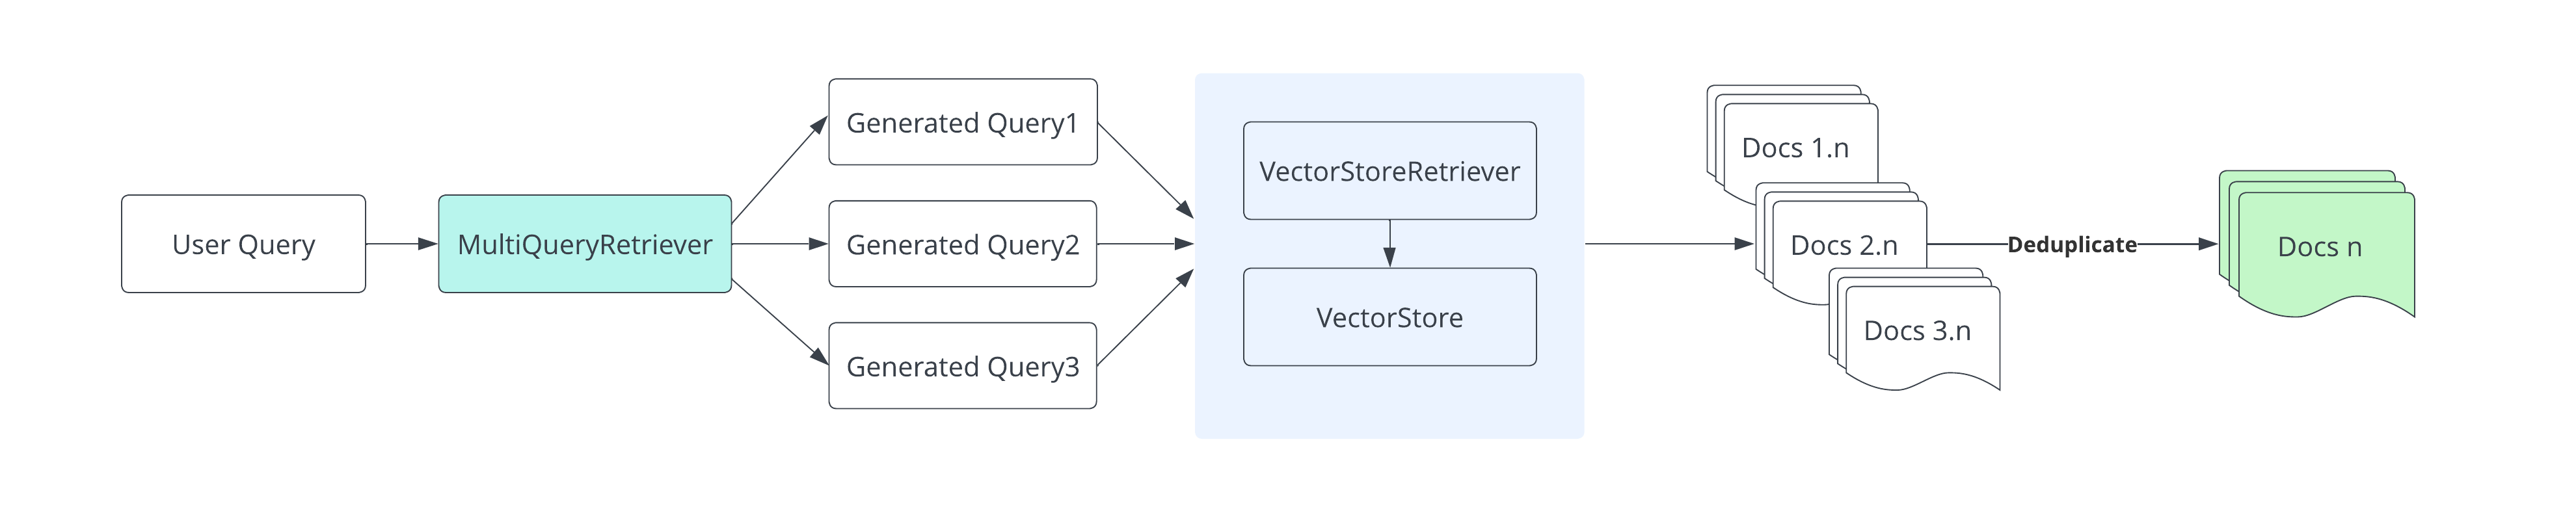


In [ ]:
from langchain_google_vertexai import ChatVertexAI, VertexAI
from langchain.retrievers.multi_query import MultiQueryRetriever
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

In [ ]:
def showMultiQueryRetriever(question, debug):

  llm = ChatVertexAI(
          model_name='chat-bison',
          temperature=0,
          max_output_tokens=2048
        )

  retriever_from_llm = MultiQueryRetriever.from_llm(retriever=vectordb.as_retriever(), llm=llm)
  context = fetch_context_documents(question, retriever_from_llm, debug)
  return create_answer_new(llm=llm, context=context, question=question, debug=debug)

In [ ]:
showMultiQueryRetriever("what was alphabet's total revenue for the fiscal year ending December 31 ?", debug=True)



> Querying retriever.
Chain ID: 'd734ef20-f03a-4fb9-9f1e-551694f6334c'
Parent chain ID: 'None'
Tags: '[]'
Retriever class: 'langchain.retrievers.multi_query.MultiQueryRetriever'
Query sent to retriever:
what was alphabet's total revenue for the fiscal year ending December 31 ?


> Starting new chain.
Chain class: 'langchain.chains.llm.LLMChain'
Chain ID: '579ee108-c3c8-4a4f-bccf-a6a66c1d803a'
Parent chain ID: 'd734ef20-f03a-4fb9-9f1e-551694f6334c'
Iterating through keys/values of chain inputs:
   question: "what was alphabet's total revenue for the fiscal year ending "
"December 31 ?"


> Sending text to the LLM.
Chain ID: 'b5d82ca3-2d75-42ef-aa52-9dd433b7a847'
Parent chain ID: '579ee108-c3c8-4a4f-bccf-a6a66c1d803a'
Text sent to LLM:
Human: You are an AI language model assistant. Your task is 
    to generate 3 different versions of the given user 
    question to retrieve relevant documents from a vector  database. 
    By generating multiple perspectives on the user question, 
    

" Alphabet's total revenue for the fiscal year ending December 31, 2021 was $257,637 million."

#ContextualCompressionRetriever

* There is often a high probability that the retrieved documents usually have a lot of irrelevant content. This can sidetrack the LLM or waste tokens that can be filled with more relevant documents. Instead of returning the documents directly, Contextual Compressor compresses the retrieved documents using the context of the query.

* Compression could mean either extracting relevant contents from the retrieved documents or dropping certain documents



* You can pair a compressor with any existing base retriever you may be currently using. Increasing the number of document returned helps to control the recall, while the compressor controls the precision.

* Using a Contextual Compression Retriever can be expensive and slow due to multiple LLM API calls.

* **[Optional Optimization]** We can reduce the cost here by using techniques like Embeddings Filter which embeds the documents and the query and returns only those documents that have sufficiently similar embeddings to the query.





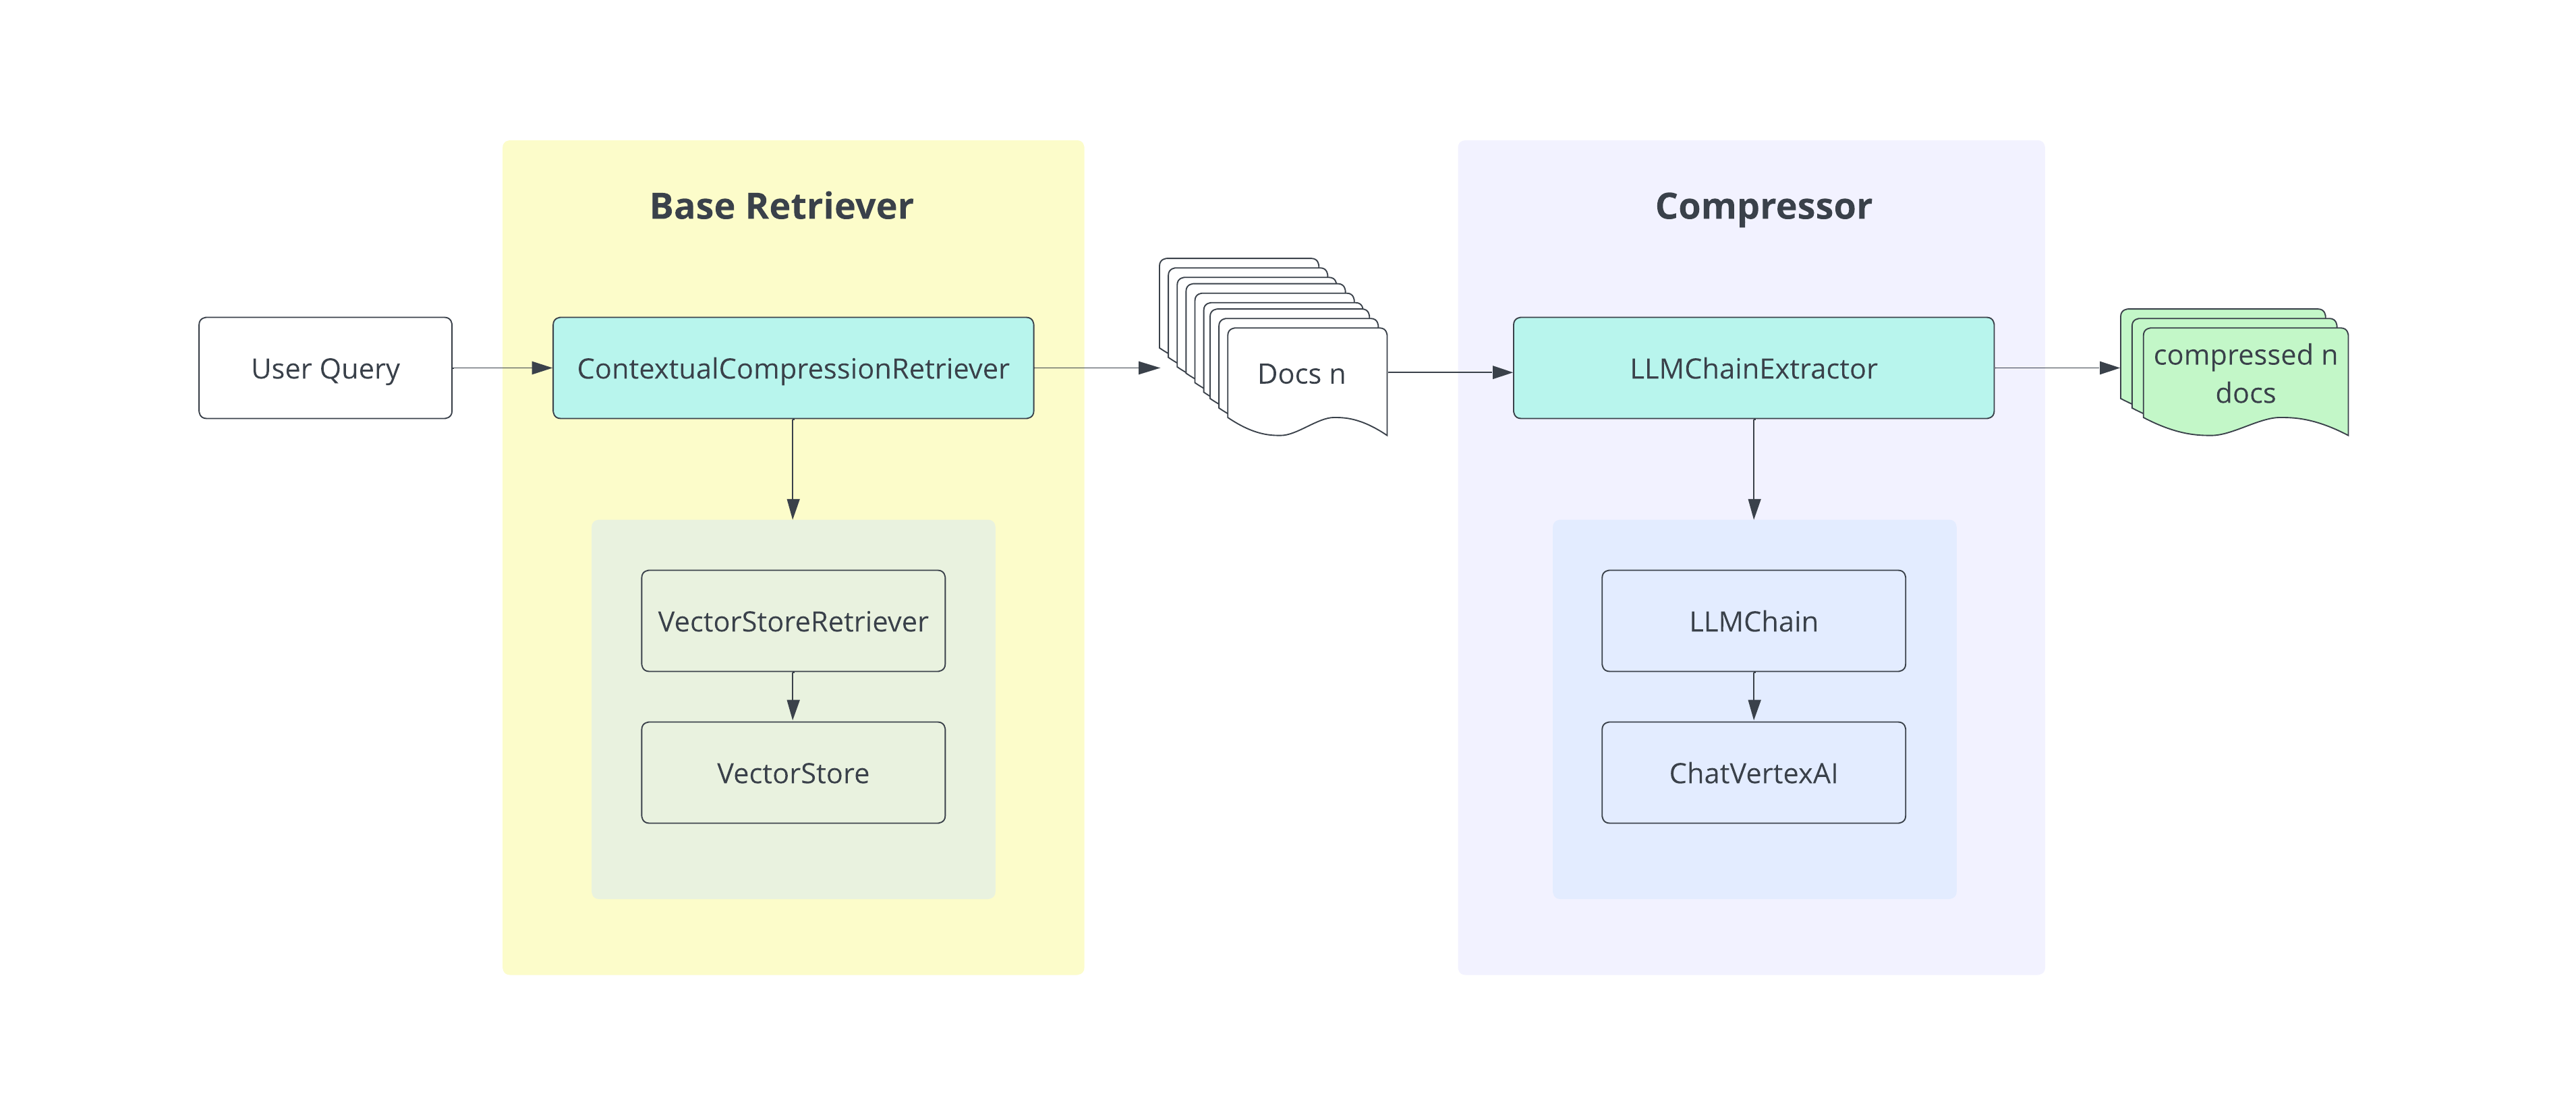

In [ ]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor

In [ ]:
def showContextualCompressionRetriever(question, debug):
  llm = ChatVertexAI(
          model_name='chat-bison@002',
          temperature=0,
          max_output_tokens=2048
        )

  compressor = LLMChainExtractor.from_llm(llm)
  compression_retriever = ContextualCompressionRetriever(base_compressor=compressor,
                                                        base_retriever=vectordb.as_retriever(), callbacks=[handler])

  context = fetch_context_documents(question, compression_retriever, debug)
  return create_answer_new(llm=llm, context=context, question=question, debug=debug)

In [ ]:
showContextualCompressionRetriever("what was alphabet's total revenue for the fiscal year ending December 31 ?", debug=True)



> Querying retriever.
Chain ID: '3430adb8-28a7-401e-8d54-70925ca0bea7'
Parent chain ID: 'None'
Tags: '[]'
Retriever class: 'langchain.retrievers.contextual_compression.'
'ContextualCompressionRetriever'
Query sent to retriever:
what was alphabet's total revenue for the fiscal year ending December 31 ?


> Querying retriever.
Chain ID: '57ec2aac-c87d-472a-9fc4-143bea4ee1f0'
Parent chain ID: '3430adb8-28a7-401e-8d54-70925ca0bea7'
Tags: "['Chroma', 'VertexAIEmbeddings']"
Retriever class: 'langchain_core.vectorstores.VectorStoreRetriever'
Query sent to retriever:
what was alphabet's total revenue for the fiscal year ending December 31 ?


> Retriever finished.
Chain ID: '57ec2aac-c87d-472a-9fc4-143bea4ee1f0'
Parent chain ID: '3430adb8-28a7-401e-8d54-70925ca0bea7'
Found 4 documents.
---------------------------------------------------
Document number 0 of 4
Metadata: "{'source': "
"'gs://alphabet-investor-reports-pdf-abhi/alphabet-investor-pdfs/20210"
"203_alphabet_10K.pdf'}"
Document cont

/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(


\n\n28.32 $\n\n27.85 $\n\n27.85 $\n\n18.27 $\n\n18.27 $\n\n'
'18.00 $\n\n18.00 $\n\n44.22 $\n\n44.22 $\n\n43.70 $\n\n43.70 $\n\n'
'49.59 $\n\n49.59 $\n\n49.16 $\n\n49.16 $\n\n59.15\n\n59.15\n\n58.61\n\n'
'58.61\n\nAs of December 31,\n\n2016\n\n2017\n\n2018\n\n2019\n\n2020\n\n'
'(in millions)\n\nConsolidated Balance Sheet Data:'


> Sending text to the LLM.
Chain ID: 'f8fdf315-ed7d-4994-8cde-87a95a72812e'
Parent chain ID: '4220fb39-c83e-4ca0-a906-2d472ea5a6d8'
Text sent to LLM:
Human: Given the following question and context, extract any part of the context *AS IS* that is relevant to answer the question. If none of the context is relevant return NO_OUTPUT. 

Remember, *DO NOT* edit the extracted parts of the context.

> Question: what was alphabet's total revenue for the fiscal year ending December 31 ?
> Context:
>>>
Copyright

©

2020 S&P, a division of The McGraw-Hill Companies Inc. All rights reserved.

28

Table of Contents

Alphabet Inc.

ITEM 6.

SELECTED FINANCIAL DATA

The fol

/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(




> Received response from LLM.
Chain ID: 'f82a8aef-e84c-4496-8da0-8abf315ae952'
Parent chain ID: '20b66f1f-0c1b-4abb-9e40-27b52d9aab60'
Text received from LLM:
 NO_OUTPUT


> Ending chain.
Chain ID: '20b66f1f-0c1b-4abb-9e40-27b52d9aab60'
Parent chain ID: '3430adb8-28a7-401e-8d54-70925ca0bea7'
Output text: "[' NO_OUTPUT']"


> Starting new chain.
Chain class: 'langchain.chains.llm.LLMChain'
Chain ID: '6a434fe2-20b7-43df-85e5-d3aa7c7e0d83'
Parent chain ID: '3430adb8-28a7-401e-8d54-70925ca0bea7'
Iterating through keys/values of chain inputs:
   question: "what was alphabet's total revenue for the fiscal year ending "
"December 31 ?"
   context: '4\n\nAlphabet Inc. CONSOLIDATED STATEMENTS OF INCOME (In millions, '
'except share amounts which are reflected in thousands and per share '
'amounts)\n\nQuarter Ended December 31,\n\nYear Ended December 31,\n\n'
'2020\n\n(unaudited)\n\n2021\n\n2020\n\n2021 (unaudited)\n\nRevenues\n\n'
'$\n\n56,898 $\n\n75,325 $\n\n182,527 $\n\n257,637\n\nCosts an

/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(




> Received response from LLM.
Chain ID: '94b9a363-73c8-40a6-af9b-c2774b3d3ae1'
Parent chain ID: '6a434fe2-20b7-43df-85e5-d3aa7c7e0d83'
Text received from LLM:
 NO_OUTPUT


> Ending chain.
Chain ID: '6a434fe2-20b7-43df-85e5-d3aa7c7e0d83'
Parent chain ID: '3430adb8-28a7-401e-8d54-70925ca0bea7'
Output text: "[' NO_OUTPUT']"


> Starting new chain.
Chain class: 'langchain.chains.llm.LLMChain'
Chain ID: 'e30e193f-6657-49a4-886a-c8e6377e4c0a'
Parent chain ID: '3430adb8-28a7-401e-8d54-70925ca0bea7'
Iterating through keys/values of chain inputs:
   question: "what was alphabet's total revenue for the fiscal year ending "
"December 31 ?"
   context: '5 %\n\n5 %\n\n30\n\nALPHABET INC. ● ANNUAL REPORT\n\nPART II '
'(cid:43)(cid:54)(cid:39)(cid:47)(cid:510)(cid:25)(cid:510)(cid:510)MA'
'NAGEMENT’S DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND '
'RESULTS OF OPERATIONS\n\nFor further details on revenues by '
'geography, see Note 2 of the Notes to Consolidated Financial '
'Statements included 

/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(




> Received response from LLM.
Chain ID: 'a5ce8e2d-29b1-4fe0-ad9e-901892390ee4'
Parent chain ID: 'e30e193f-6657-49a4-886a-c8e6377e4c0a'
Text received from LLM:
 NO_OUTPUT


> Ending chain.
Chain ID: 'e30e193f-6657-49a4-886a-c8e6377e4c0a'
Parent chain ID: '3430adb8-28a7-401e-8d54-70925ca0bea7'
Output text: "[' NO_OUTPUT']"


> Retriever finished.
Chain ID: '3430adb8-28a7-401e-8d54-70925ca0bea7'
Parent chain ID: 'None'
Found 0 documents.
No documents found.


> Starting new chain.
Chain class: 'langchain.chains.llm.LLMChain'
Chain ID: '294231ac-91c6-43bd-a44d-20890a59478a'
Parent chain ID: 'None'
Iterating through keys/values of chain inputs:
   context: '[]'
   question: "what was alphabet's total revenue for the fiscal year ending "
"December 31 ?"


> Ending chain.
Chain ID: '294231ac-91c6-43bd-a44d-20890a59478a'
Parent chain ID: 'None'
Output text: '[" I cannot answer this question as the context provided does not '
'contain any information about Alphabet\'s total revenue for the '


" I cannot answer this question as the context provided does not contain any information about Alphabet's total revenue for the fiscal year ending December 31."

# Ensemble Retriever

Ensemble Retriever enables us to perform Hybrid Search by combining keyword/term-bases and semantic search retrievers.
You can combine the Vertex Search Retriever as one of the ensemble retriever parts.
Once the documents from both retrievers are fetched - we then perform an additional reranking based on certain methods like RRF, cross-encoders or even an LLM to perform pairwise comparison.





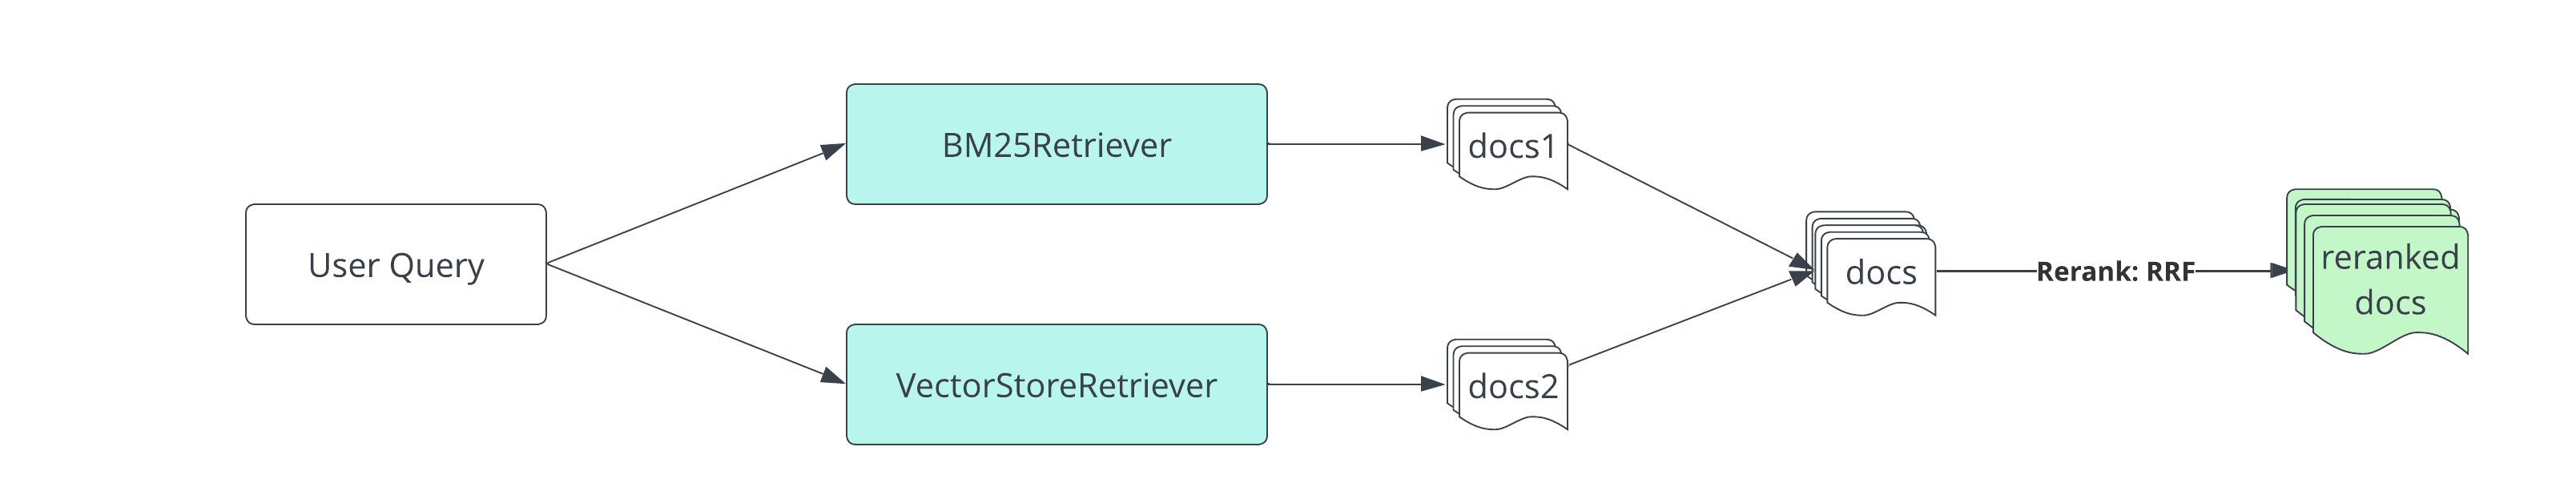


In [ ]:
from langchain.retrievers import BM25Retriever, EnsembleRetriever

In [ ]:
# initialize the bm25 retriever and faiss retriever
bm25_retriever = BM25Retriever.from_documents(splits)
bm25_retriever.k = 2


embedding = VertexAIEmbeddings(model_name='textembedding-gecko@latest')
ens_vectordb = Chroma.from_documents(splits, embedding)
ens_vectordb = ens_vectordb.as_retriever(search_kwargs={"k": 2})

In [ ]:
ensemble_retriever = EnsembleRetriever(retrievers=[bm25_retriever, ens_vectordb], weights=[0.5, 0.5])

In [ ]:
def showEnsembleRetriever(question, ensemble_retriever, debug):
    llm = ChatVertexAI(
          model_name='chat-bison@002',
          temperature=0,
          max_output_tokens=2048
        )
    context = fetch_context_documents(question, ensemble_retriever, debug)
    return create_answer_new(llm=llm, context=context, question=question, debug=debug)

In [ ]:
print(showEnsembleRetriever("what was alphabet's total revenue for the fiscal year ending December 31 ?", ensemble_retriever, debug=True))



> Querying retriever.
Chain ID: 'db8be524-c366-496a-b91b-7bed47ce0d11'
Parent chain ID: 'None'
Tags: '[]'
Retriever class: 'langchain.retrievers.ensemble.EnsembleRetriever'
Query sent to retriever:
what was alphabet's total revenue for the fiscal year ending December 31 ?


> Querying retriever.
Chain ID: 'b2eec9f0-4d93-4790-9ba7-884b9782a7f3'
Parent chain ID: 'db8be524-c366-496a-b91b-7bed47ce0d11'
Tags: "['retriever_1']"
Retriever class: 'langchain_community.retrievers.bm25.BM25Retriever'
Query sent to retriever:
what was alphabet's total revenue for the fiscal year ending December 31 ?


> Retriever finished.
Chain ID: 'b2eec9f0-4d93-4790-9ba7-884b9782a7f3'
Parent chain ID: 'db8be524-c366-496a-b91b-7bed47ce0d11'
Found 2 documents.
---------------------------------------------------
Document number 0 of 2
Metadata: "{'source': "
"'gs://alphabet-investor-reports-pdf-abhi/alphabet-investor-pdfs/20210"
"203_alphabet_10K.pdf'}"
Document contents:
We record deferred revenues when cash pa

# ParentDocumentRetriever


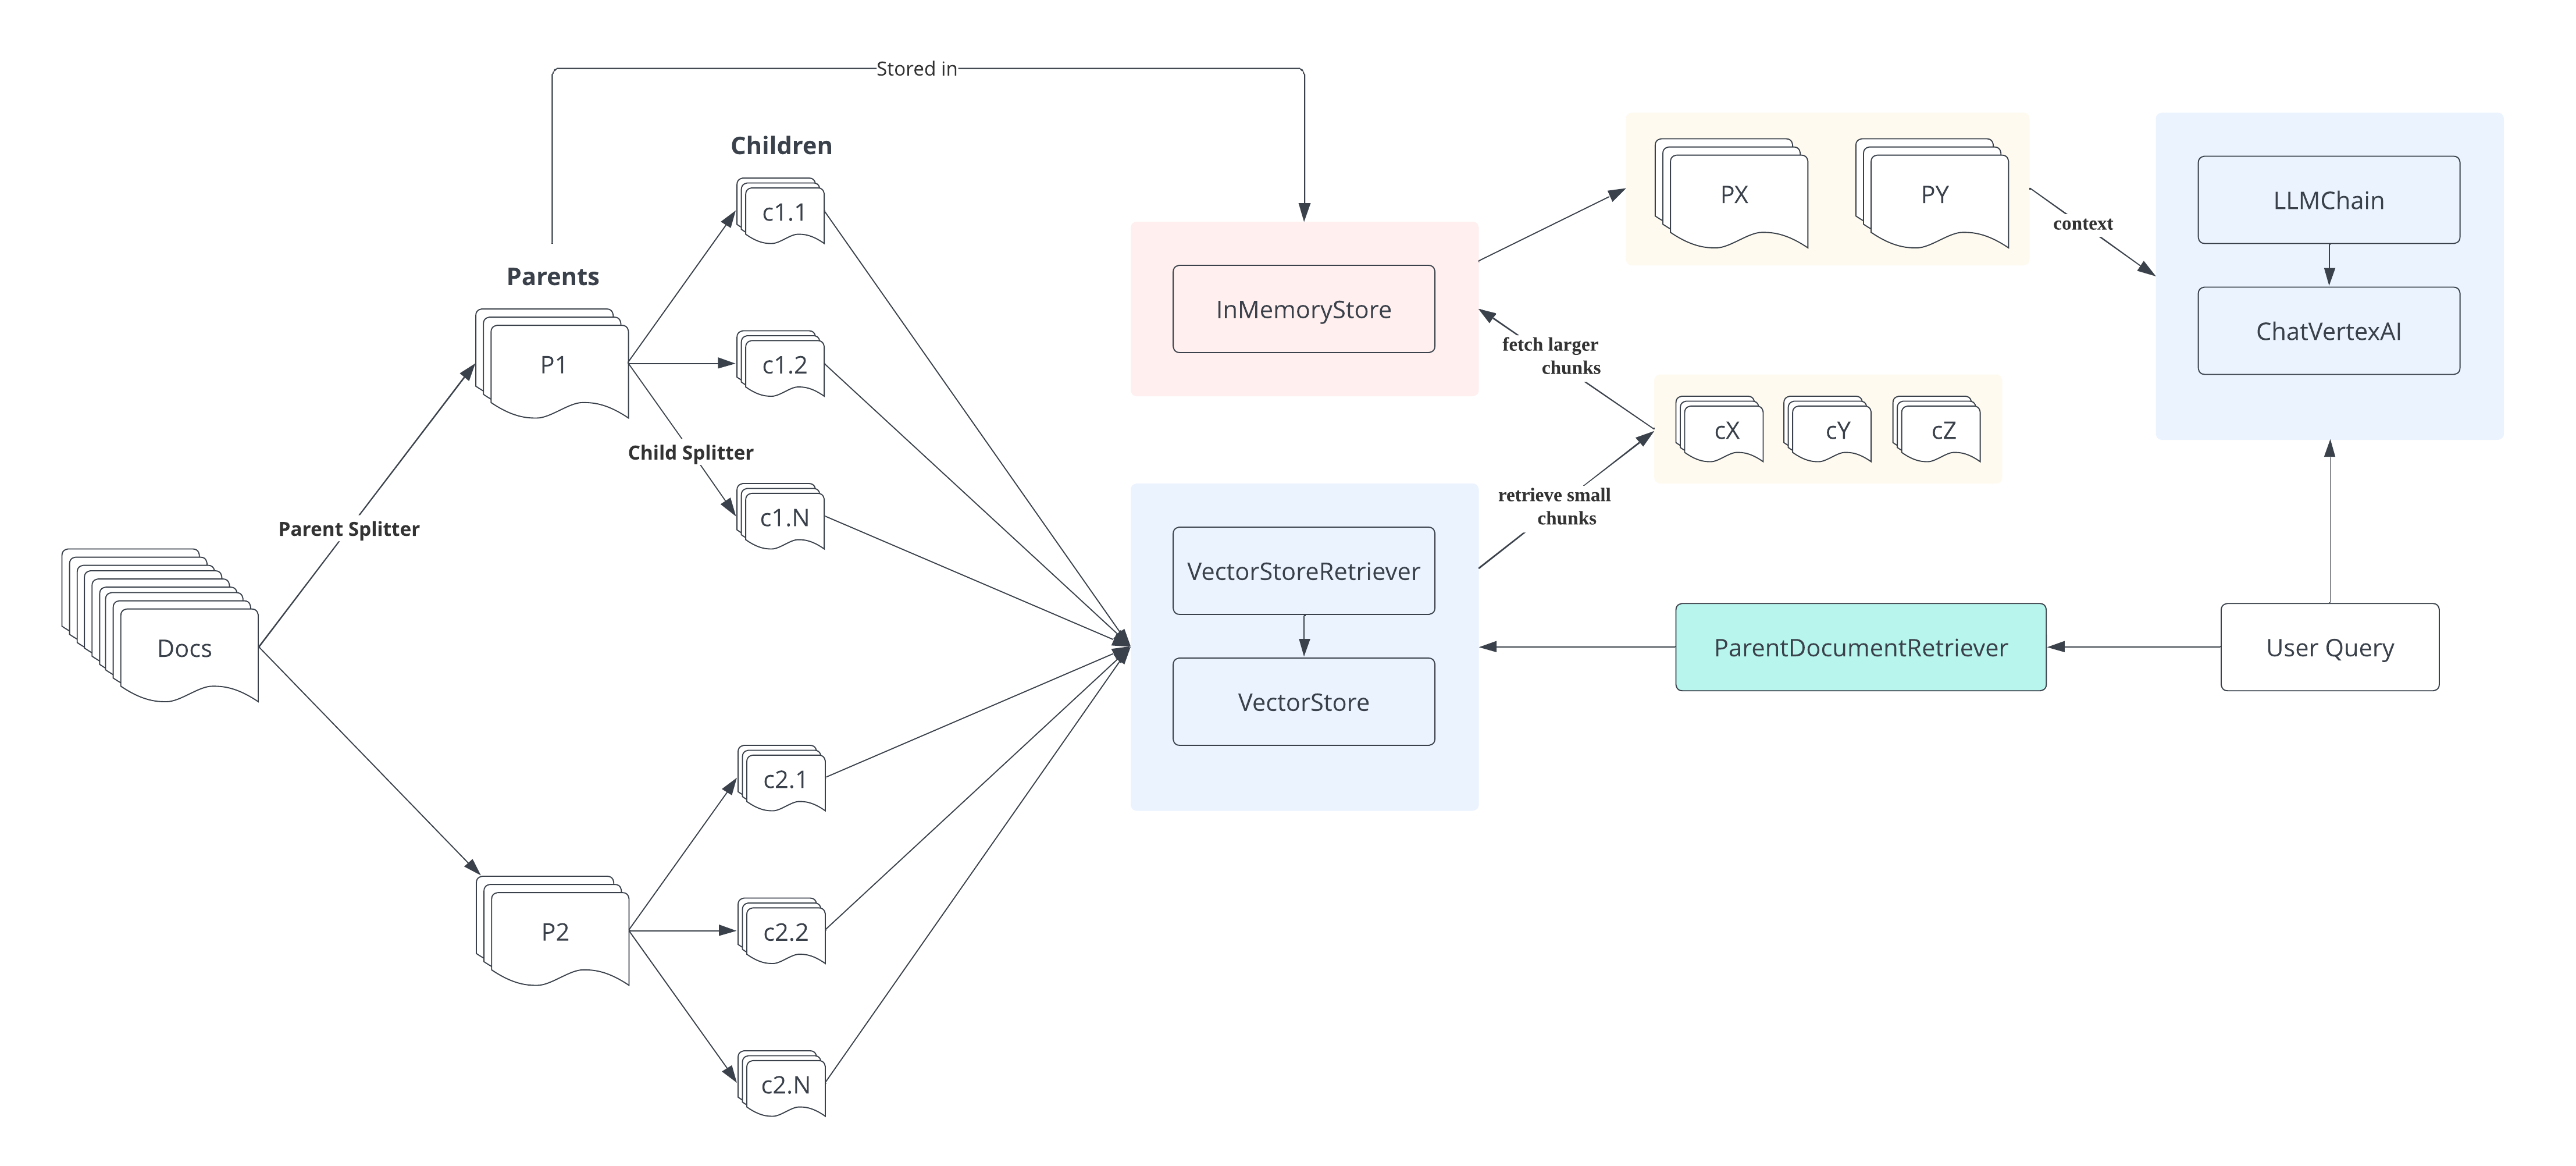

In [ ]:
from langchain.retrievers import ParentDocumentRetriever
from langchain.storage import InMemoryStore
from langchain_google_vertexai import VertexAIEmbeddings

### Full Document Retriever

In [ ]:
full_child_splitter = RecursiveCharacterTextSplitter(chunk_size=400)
# The vectorstore to use to index the child chunks
full_pd_vectorstore = Chroma(
    collection_name="full_documents", embedding_function=VertexAIEmbeddings(model_name )
)
# The storage layer for the parent documents
full_pd_store = InMemoryStore()
full_doc_retriever = ParentDocumentRetriever(
    vectorstore=full_pd_vectorstore,
    docstore=full_pd_store,
    child_splitter=full_child_splitter,
)
full_doc_retriever.add_documents(docs, ids=None)

## Large Chunk Retriever

In [ ]:
# This text splitter is used to create the parent documents
large_chunk_parent_splitter = RecursiveCharacterTextSplitter(chunk_size=2000)

# This text splitter is used to create the child documents
# It should create documents smaller than the parent
large_chunk_child_splitter = RecursiveCharacterTextSplitter(chunk_size=400)
# The vectorstore to use to index the child chunks
large_chunk_vectorstore = Chroma(
    collection_name="split_parents", embedding_function=VertexAIEmbeddings(model_name='textembedding-gecko@latest')
)
# The storage layer for the parent documents
large_chunk_store = InMemoryStore()
large_chunk_retriever = ParentDocumentRetriever(
    vectorstore=large_chunk_vectorstore,
    docstore=large_chunk_store,
    child_splitter=large_chunk_child_splitter,
    parent_splitter=large_chunk_parent_splitter,
)
large_chunk_retriever.add_documents(docs)

In [ ]:
def showParentDocumentRetriever(question, retriever, debug):

  llm = ChatVertexAI(
      model_name='chat-bison@002',
      temperature=0,
      max_output_tokens=2048
    )

  context = fetch_context_documents(question, retriever, debug)
  return create_answer_new(llm=llm, context=context, question=question, debug=debug)

In [ ]:
showParentDocumentRetriever("what was alphabet's total revenue for the fiscal year ending December 31 ?", large_chunk_retriever, debug=True)



> Querying retriever.
Chain ID: '69213be3-03fd-4c7b-8506-206197c0728a'
Parent chain ID: 'None'
Tags: '[]'
Retriever class: 'langchain.retrievers.parent_document_retriever.'
'ParentDocumentRetriever'
Query sent to retriever:
what was alphabet's total revenue for the fiscal year ending December 31 ?


> Retriever finished.
Chain ID: '69213be3-03fd-4c7b-8506-206197c0728a'
Parent chain ID: 'None'
Found 4 documents.
---------------------------------------------------
Document number 0 of 4
Metadata: "{'source': "
"'gs://alphabet-investor-reports-pdf-abhi/alphabet-investor-pdfs/20210"
"203_alphabet_10K.pdf'}"
Document contents:
5,589 11,086 28,631 7,500 2,543 1,485 56,834 13,932 481 8,849 3,561 11,146 2,269 97,072

Total liabilities

Commitments and Contingencies (Note 10) Stockholders’ equity:

Convertible preferred stock, $0.001 par value per share, 100,000 shares authorized; no shares issued and outstanding Class A and Class B common stock, and Class C capital stock and additional paid-

' The total revenue for the fiscal year ending December 31, 2021 was $257,637 million.'

## Answer Formation Comparison

As seen from the different retrievers above - they all behave differently for various types of questions.

Eg: If you are building a chatbot - your user queries might be very succint / exact and you require straightforward answers.

If you are building a research platform - your user queries may be more subjective and your answers may also need to be more complex and it needs to have additional explanation / information along with the exact answer to provide the full picture.

It is imperative to understand what kind of queries you / your user are running on your GenAI application.

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

def create_comparison_table(question):
  retrievers = {
      'multi_query_retriever': (showMultiQueryRetriever, (question,), {'debug': False}),
      'contextual_compression_retriever': (showContextualCompressionRetriever, (question,), {'debug': False}),
      'ensemble_retriever': (showEnsembleRetriever, (question, ensemble_retriever), {'debug': False}),
      'parent_document_retriever': (showParentDocumentRetriever, (question, large_chunk_retriever), {'debug': False})
  }

  outputs = {}

  # Iterating over the dictionary and executing the functions
  for retriever_name, (func, args, kwargs) in retrievers.items():
      try:
          output = func(*args, **kwargs)
          outputs[retriever_name] = output
      except Exception as e:
          print(f"{retriever_name} Error: {e}")

  # Creating a DataFrame from the successful outputs
  if outputs:
      df = pd.DataFrame([outputs])
      return(df)
  else:
      return("No retriever outputs were successfully obtained.")

In [ ]:
create_comparison_table("what was alphabet's total revenue for the fiscal year ending December 31?")

/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(


,multi_query_retriever,contextual_compression_retriever,ensemble_retriever,parent_document_retriever
0,"Alphabet's total revenue for the fiscal year ending December 31, 2021 was $257,637 million.",I cannot answer this question as the context provided does not contain any information about Alphabet's total revenue for the fiscal year ending December 31.,"Alphabet's total revenue for the fiscal year ending December 31, 2020 was $182,527 million.","Alphabet's total revenue for the fiscal year ending December 31, 2021 was $257,637 million."


In [ ]:
create_comparison_table("what did Larry and Sergey write in the original founders letter?")

/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(


,multi_query_retriever,contextual_compression_retriever,ensemble_retriever,parent_document_retriever
0,"Larry and Sergey wrote in the original founders' letter that ""Google is not a conventional company. We do not intend to become one.""",Google is not a conventional company. We do not intend to become one.,"As per the provided documents, Larry and Sergey wrote in the original founders' letter that ""Google is not a conventional company. We do not intend to become one.""","In the original founders' letter, Larry and Sergey wrote that they would not shy away from high-risk, high-reward projects that they believe in, as they are the key to their long-term success."


### [Optional] Integration with Weights & Biases Trace

Sample wandb run trace : [RUN](https://wandb.ai/abhishekbhagwat/l400-rag-testing/runs/j8fzwq1u)

In [ ]:
create_comparison_table("when did we start reporting Alphabet's AI activities?")

/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(


,multi_query_retriever,contextual_compression_retriever,ensemble_retriever,parent_document_retriever
0,The provided context does not specify when Alphabet started reporting its AI activities.,The provided context does not specify when Alphabet started reporting its AI activities. It only mentions that the company will update its segment reporting relating to certain of Alphabet's AI activities beginning in January 2023.,Beginning in January 2023.,Beginning in January 2023.


In [ ]:
create_comparison_table("what are the major contributors to alphabet revenue in 2021?")

multi_query_retriever Error: 400 The text content is empty.


/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(


,contextual_compression_retriever,ensemble_retriever,parent_document_retriever
0,I cannot answer this question as there is no information about Alphabet revenue in 2021 provided in the context.,"In 2021, the major contributors to Alphabet revenue were Google Search and advertising, which accounted for 56% of total revenue, followed by Google Cloud, which contributed 8% of total revenue. YouTube advertising made up 10% of total revenue, while other bets contributed 1%.",The provided documents do not contain information about the major contributors to Alphabet's revenue in 2021.
